In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from caveclient import CAVEclient

In [38]:
bin_width = 50 * 1000
step_size = 10 * 1000

In [39]:
datastack_name = "minnie65_phase3_v1"
client = CAVEclient(datastack_name)

In [40]:
col_cells = client.materialize.query_table("allen_v1_column_types_v2")
exc_cells = col_cells.query("classification_system == 'aibs_coarse_excitatory'")
inh_cells = col_cells.query("classification_system == 'aibs_coarse_inhibitory'")
len(exc_cells), len(inh_cells)

(1185, 162)

In [41]:
# min is pia border (L1) and max is white matter border (L6)
min_y = min(pt[1] for pt in col_cells.pt_position)
max_y = max(pt[1] for pt in col_cells.pt_position)
min_y, max_y

(80336, 295520)

In [42]:
exc_soma_densities = []
inh_soma_densities = []
bin_centers = []
curr_y = min_y
while curr_y < max_y:
    bin_centers.append(curr_y + step_size // 2)
    exc_soma_densities.append(sum(curr_y <= p[1] < curr_y + step_size for p in exc_cells.pt_position))  # todo speedup
    inh_soma_densities.append(sum(curr_y <= p[1] < curr_y + step_size for p in inh_cells.pt_position))  # todo speedup
    curr_y += step_size
exc_soma_densities = np.array(exc_soma_densities, dtype=float) / len(exc_cells)
inh_soma_densities = np.array(inh_soma_densities, dtype=float) / len(inh_cells)

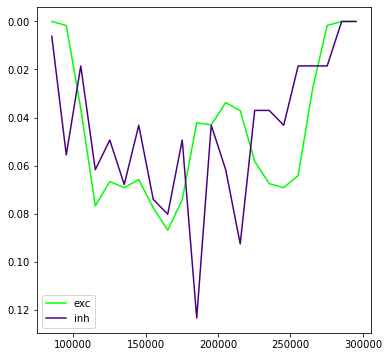

In [43]:
# todo fill with alpha = density
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(bin_centers, exc_soma_densities, c="lime", label="exc")
ax.plot(bin_centers, inh_soma_densities, c="indigo", label="inh")
ax.invert_yaxis()
ax.legend()
plt.show()